Assignment 2 code:

In [2]:
import numpy as np
import pandas as pd

In [8]:
# Add File Path of the CSV file here
# file_path = ""
file_path = "C:/Users/matt/Downloads/archive (3)/daily-website-visitors.csv"

# Reading the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

In [4]:
# View the head of the dataset
print(df.head())

# Check for null values in the dataset
print("\nNull Values:\n", df.isnull().sum())

# Get basic statistical description of the dataset
print("\nStatistics:\n", df.describe())


   Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0    1     Sunday            1  9/14/2014      2,146         1,582   
1    2     Monday            2  9/15/2014      3,621         2,528   
2    3    Tuesday            3  9/16/2014      3,698         2,630   
3    4  Wednesday            4  9/17/2014      3,667         2,614   
4    5   Thursday            5  9/18/2014      3,316         2,366   

  First.Time.Visits Returning.Visits  
0             1,430              152  
1             2,297              231  
2             2,352              278  
3             2,327              287  
4             2,130              236  

Null Values:
 Row                  0
Day                  0
Day.Of.Week          0
Date                 0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64

Statistics:
                Row  Day.Of.Week
count  2167.000000  2167.000000
mean   1084.000000     3.997231
std     625.703338     

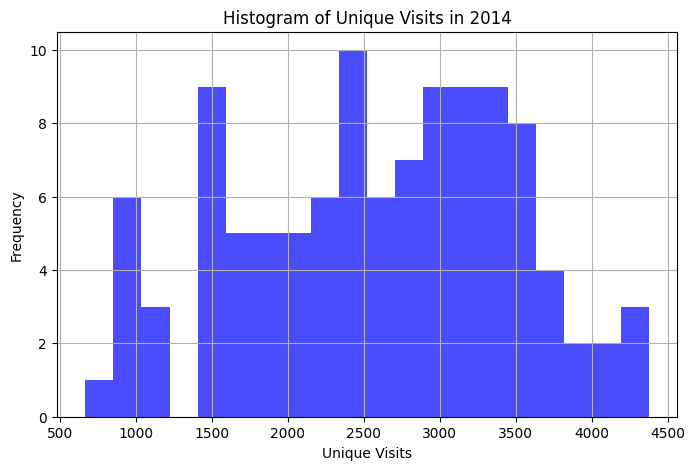

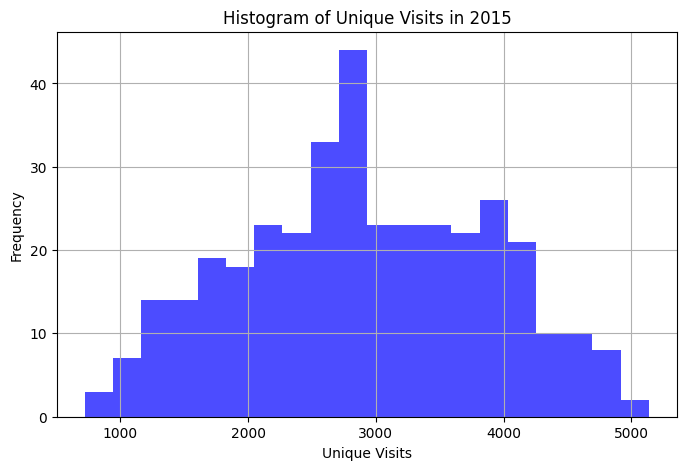

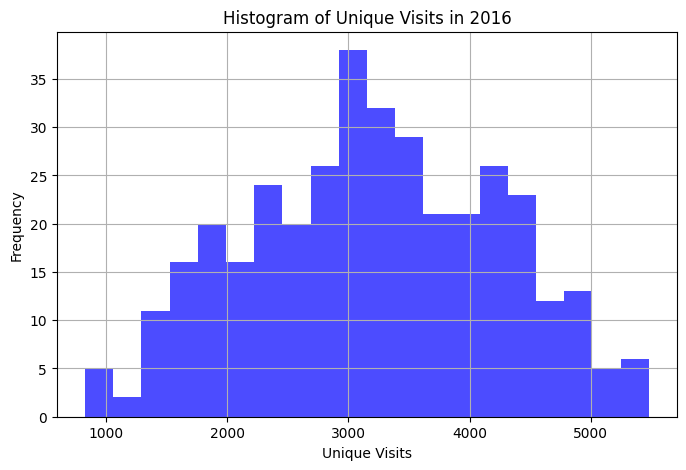

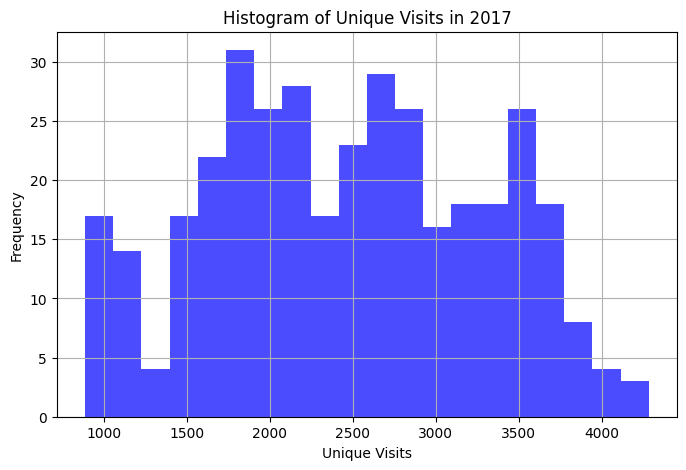

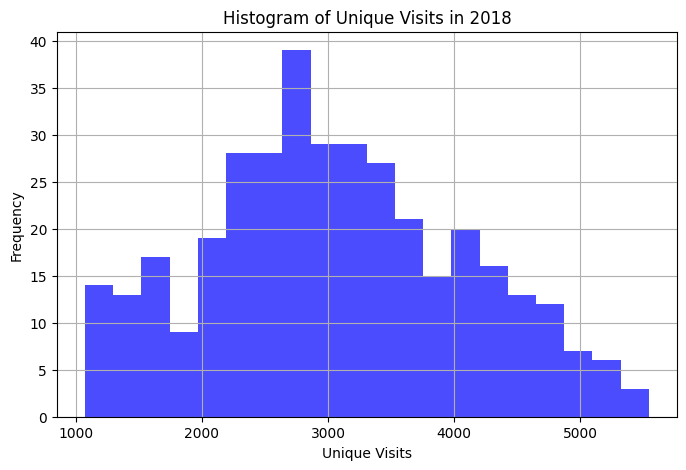

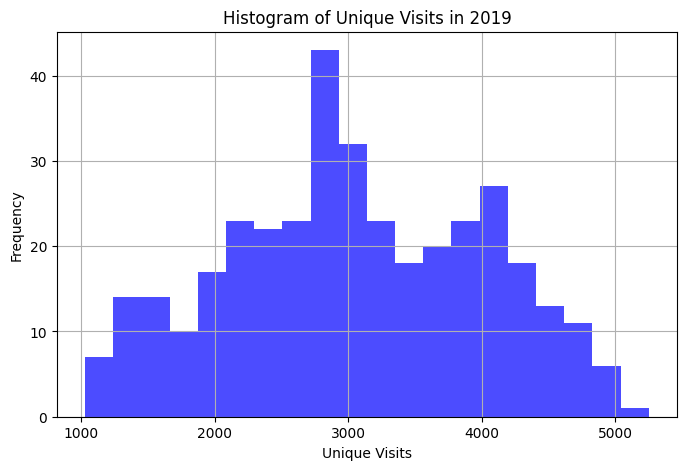

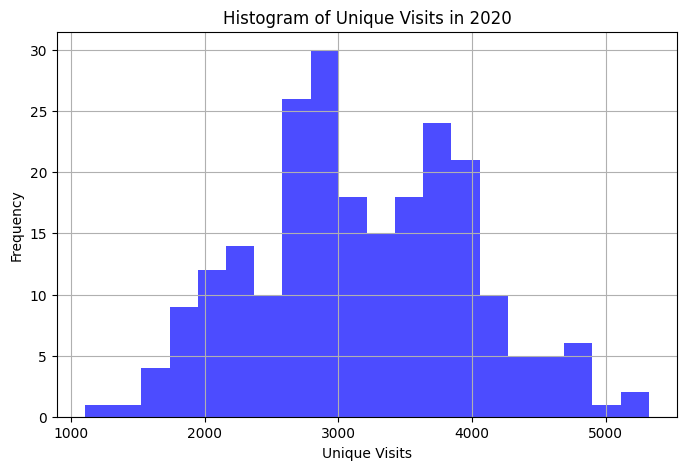

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "C:/Users/matt/Downloads/archive (3)/daily-website-visitors.csv"
df = pd.read_csv(file_path)

# Clean 'Unique.Visits' column by removing commas and converting to numeric
df['Unique.Visits'] = df['Unique.Visits'].str.replace(',', '').astype(float)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with invalid dates
df.dropna(subset=['Date'], inplace=True)

# Set 'Date' as index for easier plotting
df.set_index('Date', inplace=True)

# Create histograms for each year of 'Unique.Visits'
df['Year'] = df.index.year

# Generate histograms for each year
years = df['Year'].unique()
for year in years:
    plt.figure(figsize=(8, 5))
    plt.hist(df[df['Year'] == year]['Unique.Visits'], bins=20, color='blue', alpha=0.7)
    plt.title(f'Histogram of Unique Visits in {year}')
    plt.xlabel('Unique Visits')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


ValueError: num must be an integer with 1 <= num <= 6, not 7

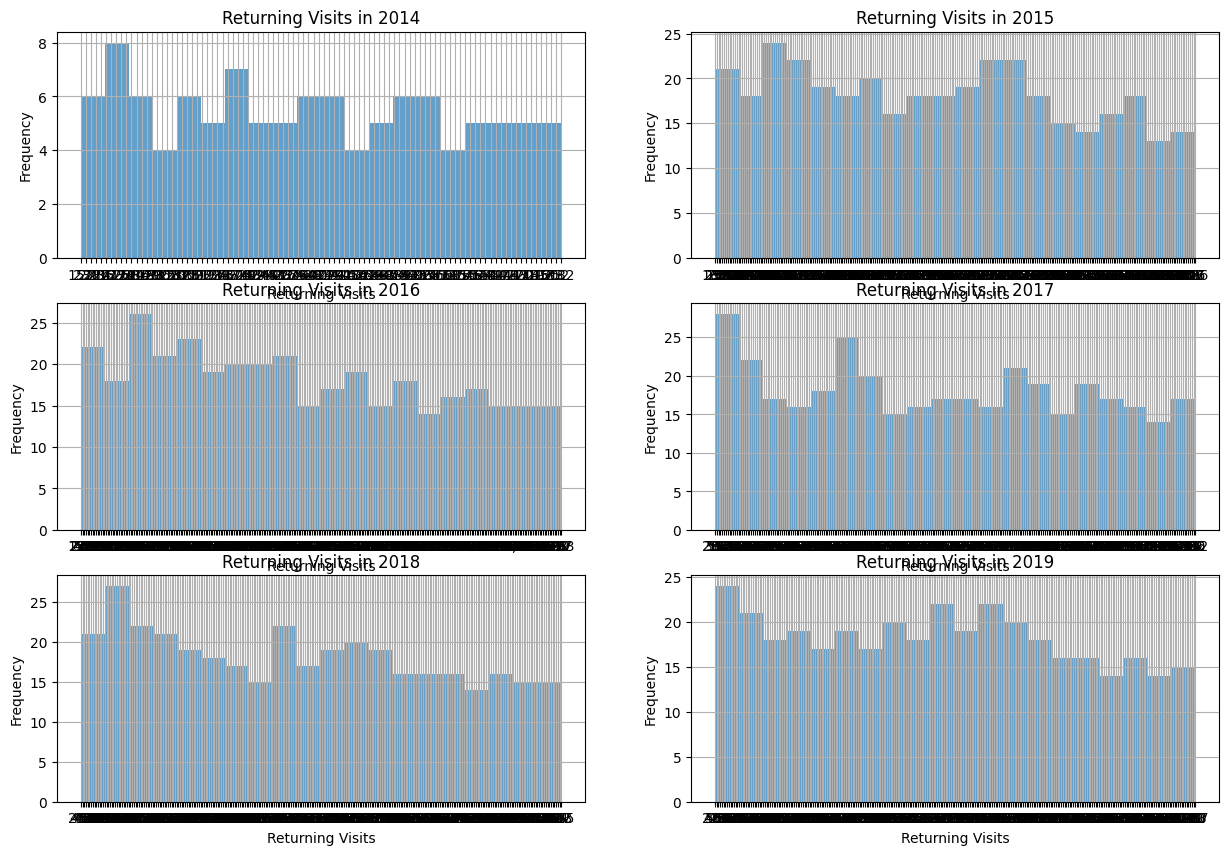

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame with 'Date' and 'Returning.Visits' columns
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' column is in datetime format
df['Year'] = df['Date'].dt.year  # Extract year from the 'Date' column

# Generate histograms for each year for 'Returning.Visits'
years = df['Year'].unique()

plt.figure(figsize=(15, 10))
for i, year in enumerate(years, 1):
    plt.subplot(3, 2, i)  # Adjust the number of rows/columns based on the number of years
    df[df['Year'] == year]['Returning.Visits'].hist(bins=20, alpha=0.7)
    plt.title(f'Returning Visits in {year}')
    plt.xlabel('Returning Visits')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
